In [2]:
import pandas as pd
%cd /home/ltchen/gnnpp
%ls utils

/home/ltchen/gnnpp
data.py  drn_utils.py  __init__.py  plot.py  __pycache__/


In [3]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt
from utils.data import load_dataframes, load_distances, normalize_features_and_create_graphs, summary_statistics #, load_complete_dataframe

import seaborn as sns

In [30]:
import xarray as xr
ZARRDATAFOLDER = '/mnt/sda/Data2/gnnpp-data/EUPPBench-stations/'
xr_train = xr.open_zarr(f'{ZARRDATAFOLDER}train.zarr')

### Dataframes for 'train': train_rf (1997-2013), test_rf (2014-2017), test_f (2017-2018)

In [31]:
dataframes_trn = load_dataframes(mode="train", leadtime="24h")
(t_train_rf, t_train_rf_target) = dataframes_trn["train"]
(t_test_rf, t_test_rf_target) = dataframes_trn["test_rf"]
(t_test_f, t_test_f_target) = dataframes_trn["test_f"]
t_stations_f = dataframes_trn["stations"]

[INFO] Dataframes exist. Will load pandas dataframes.


In [32]:
t_test_rf_target.isna().sum()

time              0
station_id        0
t2m           12401
dtype: int64

In [33]:
sum_dfs_train = summary_statistics(dataframes_trn)
print(type(sum_dfs_train))
print(sum_dfs_train[0])
# check shape of each item in dfs?

[INFO] Calculating summary statistics for train
[INFO] Calculating summary statistics for test_rf
[INFO] Calculating summary statistics for test_f
<class 'collections.defaultdict'>
None


In [34]:
print(f"Shape of train_rf: {t_train_rf.shape}")
print(f"Shape of test_rf: {t_test_rf.shape}")
print(f"Shape of test_f: {t_test_f.shape}")
print("")
print(f"# Ensemble members in train_rf: {t_train_rf.number.nunique()}")
print(f"# Ensemble members in test_rf: {t_test_rf.number.nunique()}")
print(f"# Ensemble members in test_f: {t_test_f.number.nunique()}")
print("")
print(f"Unique times in train_rf: {t_train_rf.time.nunique()}")
print(f"Unique times in test_rf: {t_test_rf.time.nunique()}")
print(f"Unique times in test_f: {t_test_f.time.nunique()}")

Shape of train_rf: (4627216, 36)
Shape of test_rf: (982344, 36)
Shape of test_f: (4542060, 36)

# Ensemble members in train_rf: 11
# Ensemble members in test_rf: 11
# Ensemble members in test_f: 51

Unique times in train_rf: 3448
Unique times in test_rf: 732
Unique times in test_f: 730


In [52]:
t_train_rf.groupby('station_id').first()

,number,time,cape,model_orography,sd,station_altitude,station_latitude,station_longitude,stl1,swvl1,...,ssr6,ssrd6,str6,strd6,tp6,z,q,u,v,t
station_id,,,,,,,,,,,,,,,,,,,,,
0,0,1997-01-02,0.515625,-1.706008,0.000000,1.2,52.928000,4.781000,281.966064,-4.102818e-22,...,0.0,0.0,-1183741.0,6533068.0,0.000038,53168.78125,0.001777,-8.083289,15.863815,271.745361
1,0,1997-01-02,3.046875,-1.298122,0.000000,-3.3,52.318000,4.790000,279.299561,5.120544e-01,...,0.0,0.0,-933629.0,6394828.0,0.000541,53179.28125,0.003039,1.166711,10.319870,271.828369
2,0,1997-01-02,0.000000,0.333424,0.000000,10.8,53.241000,4.921000,281.732178,-4.102818e-22,...,0.0,0.0,-826109.0,6875596.0,0.000040,53198.28125,0.001025,-7.635047,14.503464,272.024658
3,0,1997-01-02,0.015625,1.302155,0.000000,0.7,53.392000,5.346000,281.952881,-4.102818e-22,...,0.0,0.0,-833533.0,6891980.0,0.000154,53237.65625,0.000767,-7.935828,12.798386,272.303955
4,0,1997-01-02,3.703125,2.576800,0.000000,1.9,52.100000,5.180000,278.962158,3.447723e-01,...,0.0,0.0,-1030141.0,6236876.0,0.000784,53226.65625,0.002784,0.735070,11.590378,271.850342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0,1997-01-02,0.140625,521.714299,0.000000,331.0,45.786833,3.149333,278.517334,3.864136e-01,...,0.0,0.0,-653309.0,6549708.0,0.000114,54077.40625,0.000396,12.248742,-6.586380,271.162354
118,0,1997-01-02,4.937500,689.253673,0.001457,424.0,47.499168,9.746111,273.719482,3.999939e-01,...,0.0,0.0,-264189.0,6639820.0,0.001925,53689.40625,0.001769,9.557336,-2.701614,271.952393
119,0,1997-01-02,7.875000,972.938723,0.004192,439.0,47.266666,9.600000,273.036377,3.880310e-01,...,0.0,0.0,-295421.0,6395596.0,0.002204,53684.40625,0.001779,8.998742,-3.452591,272.081299


In [ ]:
from utils.drn_utils import normalize_features

train, valid_test = normalize_features(
    training_data=dataframes_trn["train"], valid_test_data=[dataframes_trn["test_rf"], dataframes_trn["test_f"]]
)




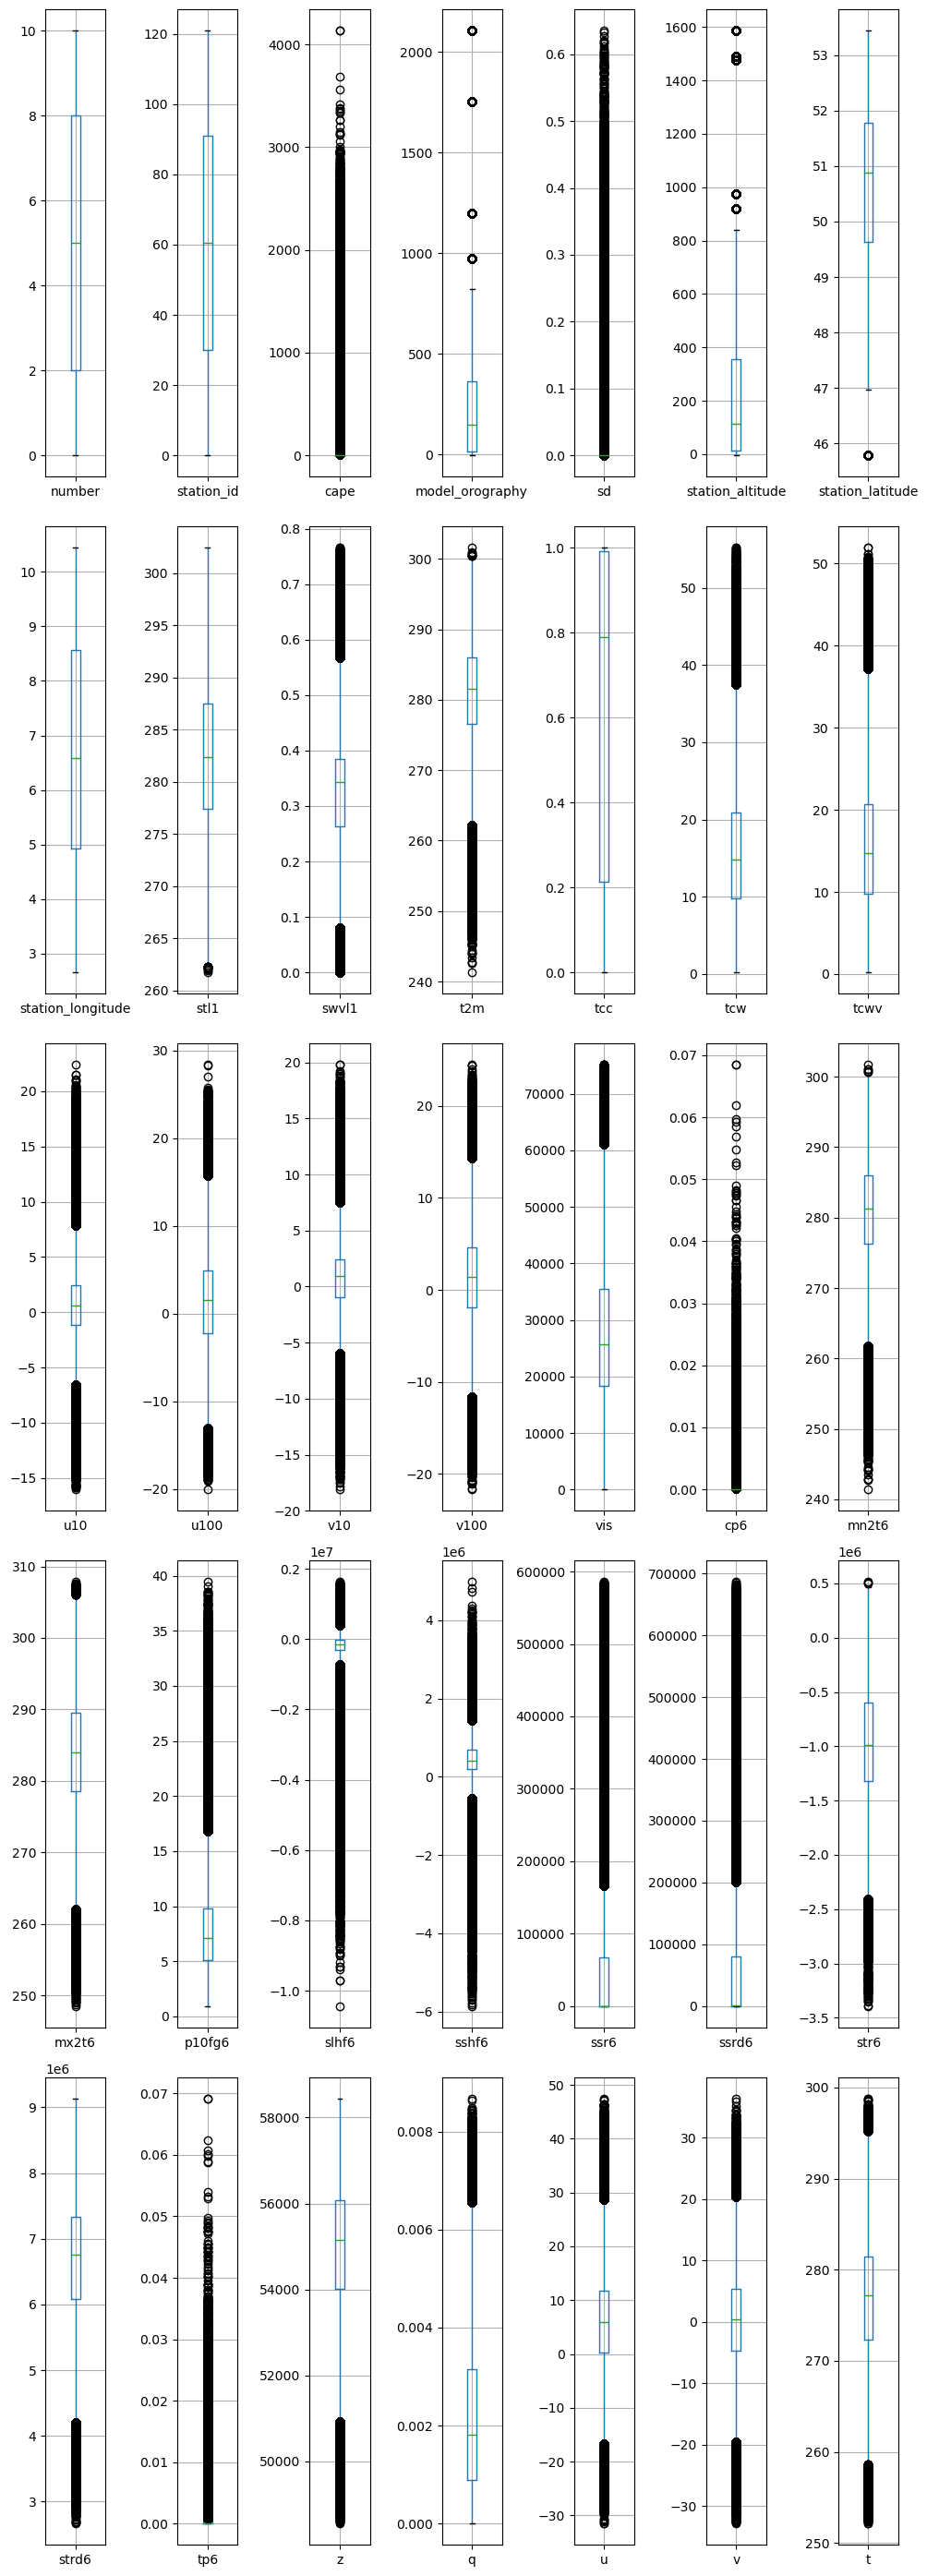

In [69]:
# plot
fig, axes = plt.subplots(5, 7, figsize=(10, 28))
axes = axes.flatten()
for i, col in enumerate(t_train_rf.select_dtypes(include=['number']).columns):
    # t_train_rf.boxplot(col, ax=axes[i])
    t_train_rf[[col]].boxplot(ax=axes[i])
plt.tight_layout()
plt.show()



In [4]:
# 72h lead time
dataframes_trn = load_dataframes(mode="train", leadtime="72h")
(t_train_rf, t_train_rf_target) = dataframes_trn["train"]
(t_test_rf, t_test_rf_target) = dataframes_trn["test_rf"]
(t_test_f, t_test_f_target) = dataframes_trn["test_f"]
t_stations_f = dataframes_trn["stations"]

[INFO] Dataframes exist. Will load pandas dataframes.


In [5]:
print(f"Shape of train_rf: {t_train_rf.shape}")
print(f"Shape of test_rf: {t_test_rf.shape}")
print(f"Shape of test_f: {t_test_f.shape}")
print("")
print(f"# Ensemble members in train_rf: {t_train_rf.number.nunique()}")
print(f"# Ensemble members in test_rf: {t_test_rf.number.nunique()}")
print(f"# Ensemble members in test_f: {t_test_f.number.nunique()}")
print("")
print(f"Unique times in train_rf: {t_train_rf.time.nunique()}")
print(f"Unique times in test_rf: {t_test_rf.time.nunique()}")
print(f"Unique times in test_f: {t_test_f.time.nunique()}")

Shape of train_rf: (4627216, 36)
Shape of test_rf: (982344, 36)
Shape of test_f: (4542060, 36)

# Ensemble members in train_rf: 11
# Ensemble members in test_rf: 11
# Ensemble members in test_f: 51

Unique times in train_rf: 3448
Unique times in test_rf: 732
Unique times in test_f: 730


### Correlations

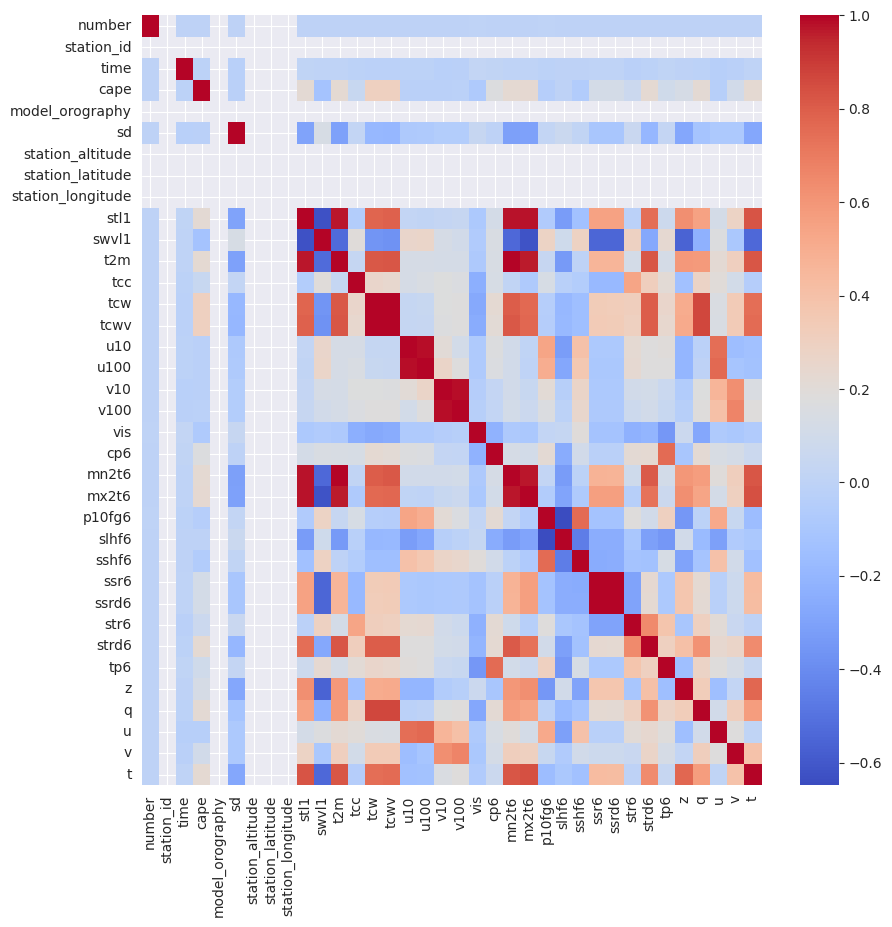

In [20]:
t_df = t_train_rf[~t_train_rf.isna()]
t_df = t_df[t_df["station_id"]==1]
corr_mat = t_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=False, cmap="coolwarm")

plt.show()


Index(['station_id', 'lat', 'lon', 'altitude', 'name'], dtype='object')


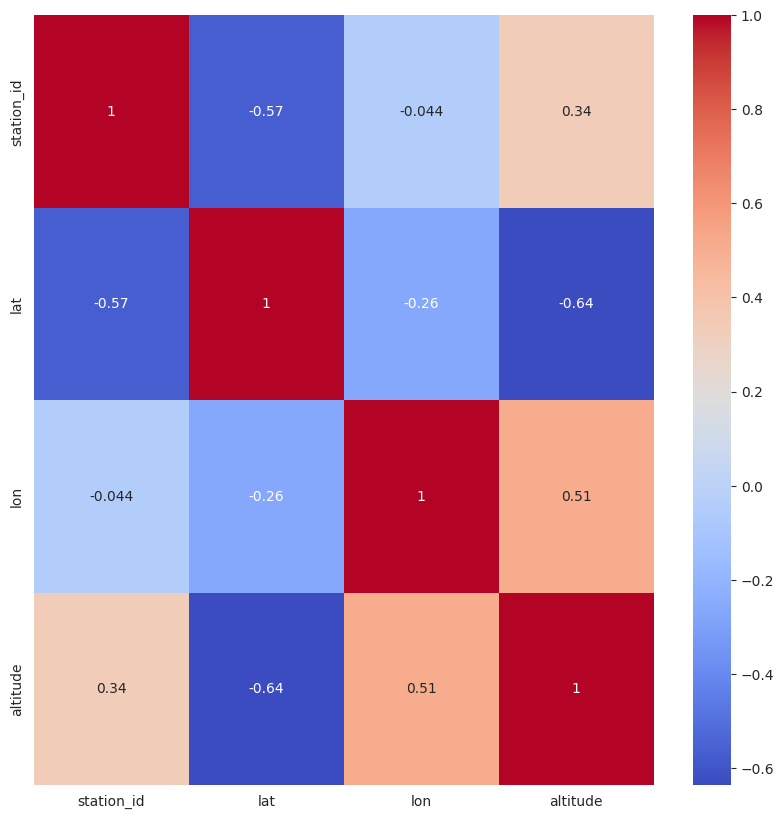

In [26]:
print(t_stations_f.columns)
stat_corr = t_stations_f.corr(numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(stat_corr, annot=True, cmap="coolwarm")

plt.show()

In [28]:
f = t_train_rf[t_train_rf["station_id"]==1]
f[f["number"]==0] #=> orog ist gleich für alle Stationen!

,number,station_id,time,cape,model_orography,sd,station_altitude,station_latitude,station_longitude,stl1,...,ssr6,ssrd6,str6,strd6,tp6,z,q,u,v,t
1,0,1,1997-01-02,3.046875,-1.298122,0.000000e+00,-3.3,52.318,4.79,279.299561,...,0.0,0.0,-933629.0,6394828.0,0.000541,53179.281250,0.003039,1.166711,10.319870,271.828369
1343,0,1,1997-01-05,1.273438,-1.298122,0.000000e+00,-3.3,52.318,4.79,279.918976,...,0.0,0.0,-197122.0,7260306.0,0.000118,51962.445312,0.001543,-2.577290,3.518695,271.292236
2685,0,1,1997-01-09,5.820312,-1.298122,0.000000e+00,-3.3,52.318,4.79,279.306091,...,0.0,0.0,-557456.0,6839308.0,0.002275,51924.449219,0.002823,11.377930,13.326906,273.165833
4027,0,1,1997-01-12,1.171875,-1.298122,0.000000e+00,-3.3,52.318,4.79,278.193359,...,0.0,0.0,-863113.0,6325202.0,0.001934,51685.464844,0.001417,10.684875,-8.862057,270.735291
5369,0,1,1997-01-16,0.000000,-1.298122,1.997948e-04,-3.3,52.318,4.79,276.083710,...,0.0,0.0,-1395984.0,5534686.0,0.000027,52818.203125,0.000074,5.814784,-16.537979,263.722168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620507,0,1,2013-12-24,3.101562,-1.298122,-7.345365e-25,-3.3,52.318,4.79,279.911377,...,512.0,0.0,-845091.0,6675014.0,0.000000,54259.664062,0.001035,7.951284,6.677403,276.278290
4621849,0,1,2013-12-25,0.000000,-1.298122,4.235744e-03,-3.3,52.318,4.79,273.332764,...,0.0,0.0,-1746839.0,4669698.0,0.000000,51843.359375,0.001010,1.757746,0.104745,265.805176
4623191,0,1,2013-12-27,17.562500,-1.298122,-7.345365e-25,-3.3,52.318,4.79,281.799072,...,0.0,0.0,-71761.0,7692180.0,0.004364,52736.414062,0.003327,5.184526,1.060848,276.746948
4624533,0,1,2013-12-28,0.000000,-1.298122,6.463528e-03,-3.3,52.318,4.79,273.772705,...,0.0,0.0,-1409367.0,5316342.0,0.000118,50611.628906,0.001041,15.424172,3.496475,266.482544


In [ ]:
# other ideas:
# plot on geographical map
# altitude in m? how often are rf and f generated? How are they generated?
# given one station - is there a correlation between the features?

### Dataframes for 'hyperopt': train_rf (1997-2009), valid_rf (2010-2013)

In [35]:
dataframes_hpo = load_dataframes(mode="hyperopt", leadtime="24h")
(h_train_rf, h_train_rf_target) = dataframes_hpo["train"]
(h_valid_rf, h_valid_rf_target) = dataframes_hpo["valid"]
h_stations_f = dataframes_hpo["stations"]

[INFO] Dataframes exist. Will load pandas dataframes.


In [36]:
print(type(h_train_rf))
print(h_train_rf.isna().any())
print(h_train_rf.shape)

<class 'pandas.core.frame.DataFrame'>
number               False
station_id           False
time                 False
cape                 False
model_orography      False
sd                   False
station_altitude     False
station_latitude     False
station_longitude    False
stl1                 False
swvl1                False
t2m                  False
tcc                  False
tcw                  False
tcwv                 False
u10                  False
u100                 False
v10                  False
v100                 False
vis                  False
cp6                  False
mn2t6                False
mx2t6                False
p10fg6               False
slhf6                False
sshf6                False
ssr6                 False
ssrd6                False
str6                 False
strd6                False
tp6                  False
z                    False
q                    False
u                    False
v                    False
t                

In [37]:
print(h_train_rf.time.nunique())

2612


### Valid vs. Train
Where is the difference? According to Paper: 1997-2009 - Train, 2010-2013 - Valid, but train for Neural network is the whole 1997-2013 data (data.py)

In [38]:
t_train_rf[t_train_rf["time"] >= pd.Timestamp("2010-01-01")]

,number,station_id,time,cape,model_orography,sd,station_altitude,station_latitude,station_longitude,stl1,...,ssr6,ssrd6,str6,strd6,tp6,z,q,u,v,t
3505304,0,0,2010-01-01,14.140625,-1.706008,0.000000e+00,1.2,52.928000,4.781000,281.176025,...,512.0,0.0,-320542.0,7329452.0,0.002572,52367.363281,0.000922,28.197216,0.521469,268.487061
3505305,0,1,2010-01-01,0.644531,-1.298122,0.000000e+00,-3.3,52.318000,4.790000,280.419189,...,256.0,0.0,-134942.0,7525036.0,0.001726,53026.363281,0.001030,30.372997,4.801743,269.730225
3505306,0,2,2010-01-01,27.640625,0.333424,0.000000e+00,10.8,53.241000,4.921000,281.146729,...,-256.0,0.0,-179486.0,7468460.0,0.003463,52196.113281,0.000847,28.360302,0.835922,268.683838
3505307,0,3,2010-01-01,20.640625,1.302155,0.000000e+00,0.7,53.392000,5.346000,280.999268,...,0.0,0.0,-204574.0,7426732.0,0.003021,52033.863281,0.000806,28.072216,1.122055,268.738037
3505308,0,4,2010-01-01,0.031250,2.576800,9.536743e-07,1.9,52.100000,5.180000,280.063232,...,256.0,0.0,-142110.0,7525036.0,0.002074,53305.613281,0.001547,29.286083,7.140610,270.314697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627211,10,117,2013-12-31,0.000000,521.714299,4.768372e-07,331.0,45.786833,3.149333,279.493164,...,256.0,0.0,-143360.0,7308184.0,0.000615,54514.839844,0.000418,9.023217,-7.585236,273.686523
4627212,10,118,2013-12-31,0.835938,689.253673,3.448963e-03,424.0,47.499168,9.746111,276.170898,...,0.0,0.0,-144640.0,6865816.0,0.001583,53777.839844,0.002320,7.843530,-1.359650,272.332031
4627213,10,119,2013-12-31,0.066406,972.938723,1.125574e-02,439.0,47.266666,9.600000,274.761230,...,256.0,0.0,-241408.0,6569880.0,0.001027,53797.214844,0.002263,7.382592,-1.995392,272.665039
4627214,10,120,2013-12-31,12.542969,1752.460782,8.629847e-02,1478.0,47.255833,10.186111,273.824219,...,0.0,0.0,-81408.0,6507928.0,0.001409,53763.214844,0.002243,6.108178,-2.018829,272.824219


In [39]:
h_valid_rf

,number,station_id,time,cape,model_orography,sd,station_altitude,station_latitude,station_longitude,stl1,...,ssr6,ssrd6,str6,strd6,tp6,z,q,u,v,t
3505304,0,0,2010-01-01,14.140625,-1.706008,0.000000e+00,1.2,52.928000,4.781000,281.176025,...,512.0,0.0,-320542.0,7329452.0,0.002572,52367.363281,0.000922,28.197216,0.521469,268.487061
3505305,0,1,2010-01-01,0.644531,-1.298122,0.000000e+00,-3.3,52.318000,4.790000,280.419189,...,256.0,0.0,-134942.0,7525036.0,0.001726,53026.363281,0.001030,30.372997,4.801743,269.730225
3505306,0,2,2010-01-01,27.640625,0.333424,0.000000e+00,10.8,53.241000,4.921000,281.146729,...,-256.0,0.0,-179486.0,7468460.0,0.003463,52196.113281,0.000847,28.360302,0.835922,268.683838
3505307,0,3,2010-01-01,20.640625,1.302155,0.000000e+00,0.7,53.392000,5.346000,280.999268,...,0.0,0.0,-204574.0,7426732.0,0.003021,52033.863281,0.000806,28.072216,1.122055,268.738037
3505308,0,4,2010-01-01,0.031250,2.576800,9.536743e-07,1.9,52.100000,5.180000,280.063232,...,256.0,0.0,-142110.0,7525036.0,0.002074,53305.613281,0.001547,29.286083,7.140610,270.314697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627211,10,117,2013-12-31,0.000000,521.714299,4.768372e-07,331.0,45.786833,3.149333,279.493164,...,256.0,0.0,-143360.0,7308184.0,0.000615,54514.839844,0.000418,9.023217,-7.585236,273.686523
4627212,10,118,2013-12-31,0.835938,689.253673,3.448963e-03,424.0,47.499168,9.746111,276.170898,...,0.0,0.0,-144640.0,6865816.0,0.001583,53777.839844,0.002320,7.843530,-1.359650,272.332031
4627213,10,119,2013-12-31,0.066406,972.938723,1.125574e-02,439.0,47.266666,9.600000,274.761230,...,256.0,0.0,-241408.0,6569880.0,0.001027,53797.214844,0.002263,7.382592,-1.995392,272.665039
4627214,10,120,2013-12-31,12.542969,1752.460782,8.629847e-02,1478.0,47.255833,10.186111,273.824219,...,0.0,0.0,-81408.0,6507928.0,0.001409,53763.214844,0.002243,6.108178,-2.018829,272.824219


In [41]:
h_valid_rf.equals(t_train_rf[t_train_rf["time"] >= pd.Timestamp("2010-01-01")])

True

### Ensemble Member vs. actual Plots

1       278.737213
123     279.326904
245     279.822876
367     278.299561
489     278.829437
611     279.344177
733     278.581055
855     277.779602
977     280.218353
1099    278.959167
1221    277.982788
Name: t2m, dtype: float32
(11,)
        time  station_id     t2m
1 1997-01-02           1  279.55
(1, 3)


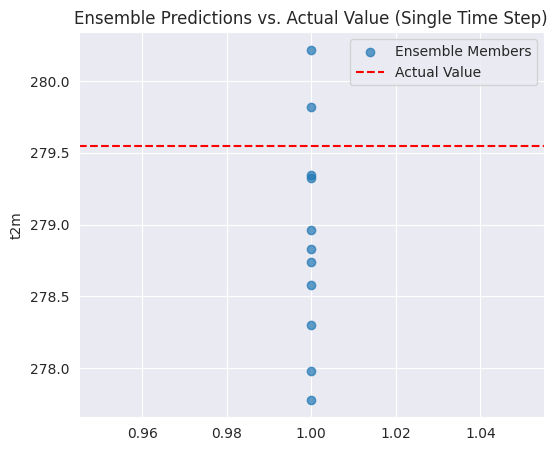

In [27]:
import numpy as np
# plot one Station, all ensembles, one point in time
print(t_train_rf[(t_train_rf["station_id"]==1) & (t_train_rf["time"]=="1997-01-02")]["t2m"])
ensembles = t_train_rf[(t_train_rf["station_id"]==1) & (t_train_rf["time"]=="1997-01-02")]["t2m"]
print(ensembles.shape)
# predicted t2m mu via neural network (crps) for this time and this station

# actual t2m for this station
print(t_train_rf_target[(t_train_rf_target["station_id"]==1) & (t_train_rf_target["time"]=="1997-01-02")])
actual = t_train_rf_target[(t_train_rf_target["station_id"]==1) & (t_train_rf_target["time"]=="1997-01-02")]
print(actual.shape)

plt.figure(figsize=(6, 5))

plt.scatter(np.ones(len(ensembles)), ensembles, label="Ensemble Members", alpha=0.7)
plt.axhline(actual.iloc[0, 2], color="red", linestyle="--", label="Actual Value")
#plt.xticks(range(len(ensembles)), [f"Member {i+1}" for i in range(len(ensembles))])
plt.ylabel("t2m")
plt.title("Ensemble Predictions vs. Actual Value (Single Time Step)")
plt.legend()
plt.show()

